## RQ1:

Who wants to be a Champion? 
Create a plot where each point (x,y) represents the number of points obtained by team x at game week y
Highlight the two teams that got the longest winning streak (# of consecutive wins), and the two teams that got the longest losing streak (# of consecutive losses).

In [42]:
import pandas as pd 
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
matches_df=pd.read_json('./DS/matches/matches_England.json' )

In [44]:
matches_df.head(5)

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Burnley - AFC Bournemouth, 1 - 2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Turf Moor,1659,2500089
1,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Crystal Palace - West Bromwich Albion, 2 - 0","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,1628,2500090
2,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,1609,2500091
3,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Liverpool - Brighton & Hove Albion, 4 - 0","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Anfield,1612,2500092
4,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Manchester United - Watford, 1 - 0","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",Old Trafford,1611,2500093


In [46]:
matches_df.columns

Index(['competitionId', 'date', 'dateutc', 'duration', 'gameweek', 'label',
       'referees', 'roundId', 'seasonId', 'status', 'teamsData', 'venue',
       'winner', 'wyId'],
      dtype='object')

In [47]:
# Drop unused columns from original dataframe
matches_df=matches_df.drop(columns=['competitionId','date', 'dateutc', 'duration',
    'referees', 'roundId', 'seasonId','venue','wyId','teamsData'])
matches_df.head(5)

,gameweek,label,status,winner
0,38,"Burnley - AFC Bournemouth, 1 - 2",Played,1659
1,38,"Crystal Palace - West Bromwich Albion, 2 - 0",Played,1628
2,38,"Huddersfield Town - Arsenal, 0 - 1",Played,1609
3,38,"Liverpool - Brighton & Hove Albion, 4 - 0",Played,1612
4,38,"Manchester United - Watford, 1 - 0",Played,1611


# Split the label


In [48]:
#split it to team1 team2 score1 score2 
matches_df['label'][0]

'Burnley - AFC Bournemouth, 1 - 2'

In [49]:
#str.split(pat=None, n=-1, expand=False)
lb=matches_df.label.str.split("-" , expand=True)
lb.head(5)

,0,1,2
0,Burnley,"AFC Bournemouth, 1",2
1,Crystal Palace,"West Bromwich Albion, 2",0
2,Huddersfield Town,"Arsenal, 0",1
3,Liverpool,"Brighton & Hove Albion, 4",0
4,Manchester United,"Watford, 1",0


In [50]:
lb.columns=['Team1','Team2','score2']
lb['Team1']=lb['Team1'].str.strip()
lb['score2']=lb['score2'].str.strip()

In [51]:
lb.head(5)

,Team1,Team2,score2
0,Burnley,"AFC Bournemouth, 1",2
1,Crystal Palace,"West Bromwich Albion, 2",0
2,Huddersfield Town,"Arsenal, 0",1
3,Liverpool,"Brighton & Hove Albion, 4",0
4,Manchester United,"Watford, 1",0


In [52]:
lb2 =lb.Team2.str.split(',', expand=True)
lb2.head(5)

,0,1
0,AFC Bournemouth,1
1,West Bromwich Albion,2
2,Arsenal,0
3,Brighton & Hove Albion,4
4,Watford,1


In [53]:
lb2.columns=["Team 2","score1"]
lb2['Team 2']=lb2['Team 2'].str.strip()
lb2['score1']=lb2['score1'].str.strip()
lb2.head(5)

,Team 2,score1
0,AFC Bournemouth,1
1,West Bromwich Albion,2
2,Arsenal,0
3,Brighton & Hove Albion,4
4,Watford,1


In [54]:
label=pd.concat([lb,lb2], axis=1)

In [55]:
label=label.drop(columns=['Team2'])
# Unnecessary column due to spliting the labels

In [56]:
label.head(5)

,Team1,score2,Team 2,score1
0,Burnley,2,AFC Bournemouth,1
1,Crystal Palace,0,West Bromwich Albion,2
2,Huddersfield Town,1,Arsenal,0
3,Liverpool,0,Brighton & Hove Albion,4
4,Manchester United,0,Watford,1


In [57]:
#Rearranging the col
label=label[['Team1',"score1",'Team 2','score2']]
label.head(5)

,Team1,score1,Team 2,score2
0,Burnley,1,AFC Bournemouth,2
1,Crystal Palace,2,West Bromwich Albion,0
2,Huddersfield Town,0,Arsenal,1
3,Liverpool,4,Brighton & Hove Albion,0
4,Manchester United,1,Watford,0


In [58]:
label.head(5)

,Team1,score1,Team 2,score2
0,Burnley,1,AFC Bournemouth,2
1,Crystal Palace,2,West Bromwich Albion,0
2,Huddersfield Town,0,Arsenal,1
3,Liverpool,4,Brighton & Hove Albion,0
4,Manchester United,1,Watford,0


In [59]:
#conect all
matches_df=pd.concat([matches_df , label ], axis=1)

In [60]:
matches_df=matches_df.drop(columns=['label'])

In [61]:
matches_df.head(10)

,gameweek,status,winner,Team1,score1,Team 2,score2
0,38,Played,1659,Burnley,1,AFC Bournemouth,2
1,38,Played,1628,Crystal Palace,2,West Bromwich Albion,0
2,38,Played,1609,Huddersfield Town,0,Arsenal,1
3,38,Played,1612,Liverpool,4,Brighton & Hove Albion,0
4,38,Played,1611,Manchester United,1,Watford,0
5,38,Played,1613,Newcastle United,3,Chelsea,0
6,38,Played,1625,Southampton,0,Manchester City,1
7,38,Played,1639,Swansea City,1,Stoke City,2
8,38,Played,1624,Tottenham Hotspur,5,Leicester City,4
9,38,Played,1633,West Ham United,3,Everton,1


# Now calculate the points 


In [62]:
#calculate the points , add two columns for both teams 
matches_df["Points1"]=0
matches_df["Points2"]=0

In [63]:
#winner 3 , loser 0 ,tie 1 for both 
# for i in range(len(matches_df)):
#     if score1>score2:
#         insert 3 in point1
#     elif score1<score2:
#         insert 3 in points2
#     elif score1==score2:
#         insert 1 in point 1 and point2  

for i in range(len(matches_df)):
    if matches_df.score1.iloc[i]>matches_df.score2.iloc[i]:
        matches_df.Points1.iloc[i]=3
    elif matches_df.score1.iloc[i]<matches_df.score2.iloc[i]:
        matches_df.Points2.iloc[i]=3
    elif matches_df.score1.iloc[i] == matches_df.score2.iloc[i]:
        matches_df.Points1.iloc[i]=1
        matches_df.Points2.iloc[i]=1
        
    

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [64]:
matches_df.head(10)

,gameweek,status,winner,Team1,score1,Team 2,score2,Points1,Points2
0,38,Played,1659,Burnley,1,AFC Bournemouth,2,0,3
1,38,Played,1628,Crystal Palace,2,West Bromwich Albion,0,3,0
2,38,Played,1609,Huddersfield Town,0,Arsenal,1,0,3
3,38,Played,1612,Liverpool,4,Brighton & Hove Albion,0,3,0
4,38,Played,1611,Manchester United,1,Watford,0,3,0
5,38,Played,1613,Newcastle United,3,Chelsea,0,3,0
6,38,Played,1625,Southampton,0,Manchester City,1,0,3
7,38,Played,1639,Swansea City,1,Stoke City,2,0,3
8,38,Played,1624,Tottenham Hotspur,5,Leicester City,4,3,0
9,38,Played,1633,West Ham United,3,Everton,1,3,0


In [65]:
#rearranging the cols order
matches_df=matches_df[["gameweek",'status','winner','Team1' ,'Points1','Team 2' ,'Points2']]

In [66]:
matches_df.sort_values(by='gameweek')

,gameweek,status,winner,Team1,Points1,Team 2,Points2
379,1,Played,1609,Arsenal,3,Leicester City,0
370,1,Played,1611,Manchester United,3,West Ham United,0
371,1,Played,1624,Newcastle United,0,Tottenham Hotspur,3
372,1,Played,1625,Brighton & Hove Albion,0,Manchester City,3
373,1,Played,1646,Chelsea,0,Burnley,3
378,1,Played,0,Watford,1,Liverpool,1
375,1,Played,1623,Everton,3,Stoke City,0
376,1,Played,0,Southampton,1,Swansea City,1
377,1,Played,1627,West Bromwich Albion,3,AFC Bournemouth,0
374,1,Played,1673,Crystal Palace,0,Huddersfield Town,3


In [67]:
#Now we need table for all teams(both1 and 2) and their points per week
teams1 = matches_df[['gameweek','Team1','Points1']]
teams1.head(11)

,gameweek,Team1,Points1
0,38,Burnley,0
1,38,Crystal Palace,3
2,38,Huddersfield Town,0
3,38,Liverpool,3
4,38,Manchester United,3
5,38,Newcastle United,3
6,38,Southampton,0
7,38,Swansea City,0
8,38,Tottenham Hotspur,3
9,38,West Ham United,3


In [68]:
#rename to concat later 
teams1.columns=['gameweek','Team','Points']
teams1.head(5)

,gameweek,Team,Points
0,38,Burnley,0
1,38,Crystal Palace,3
2,38,Huddersfield Town,0
3,38,Liverpool,3
4,38,Manchester United,3


In [69]:
teams2 = matches_df[['gameweek','Team 2','Points2']]
#rename to concat 
teams2.columns=['gameweek','Team','Points']
teams2.head(11)

,gameweek,Team,Points
0,38,AFC Bournemouth,3
1,38,West Bromwich Albion,0
2,38,Arsenal,3
3,38,Brighton & Hove Albion,0
4,38,Watford,0
5,38,Chelsea,0
6,38,Manchester City,3
7,38,Stoke City,3
8,38,Leicester City,0
9,38,Everton,0


In [70]:
points_team=pd.concat([teams1, teams2], axis=0)
points_team=points_team.groupby(['gameweek','Team']).sum()
#groupby loses cols! so reset index
points_team=points_team.reset_index()


In [71]:
points_team.head(5)

,gameweek,Team,Points
0,1,AFC Bournemouth,0
1,1,Arsenal,3
2,1,Brighton & Hove Albion,0
3,1,Burnley,3
4,1,Chelsea,0


In [72]:
allTeams=list(points_team.Team.unique())

In [73]:
allTeams

['AFC Bournemouth',
 'Arsenal',
 'Brighton & Hove Albion',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Huddersfield Town',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Newcastle United',
 'Southampton',
 'Stoke City',
 'Swansea City',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United']

In [264]:
weeks=range(0,39)
#create new dataframe with columns the number of weeks, rows each team and their point per week
#Easier to plot 
thePlot=pd.DataFrame(index=allTeams, columns=weeks)
thePlot[0]=0 # week 0 fill it with 0
thePlot[:5]

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
AFC Bournemouth,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arsenal,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brighton & Hove Albion,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Burnley,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chelsea,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
points_team

,gameweek,Team,Points
0,1,AFC Bournemouth,0
1,1,Arsenal,3
2,1,Brighton & Hove Albion,0
3,1,Burnley,3
4,1,Chelsea,0
5,1,Crystal Palace,0
6,1,Everton,3
7,1,Huddersfield Town,3
8,1,Leicester City,0
9,1,Liverpool,1


In [272]:
# Populate the plot
for i in allTeams:
    for x in range(1,39):
        t=points_team.loc[(points_team['gameweek'] == x)&(points_team['Team']== i),'Points'] #for every corresponding to the same number of week and same team(put its points instead)
        thePlot.loc[i,x] =thePlot.loc[i,x-1]+int(t) 
        #fill the current cell with the corresponding name of team & week number and keep passing the points obtaind from previous weeks -x to the next

In [273]:
thePlot

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
AFC Bournemouth,0,0,0,0,0,3,3,4,4,7,...,33,33,36,37,38,38,38,38,41,44
Arsenal,0,3,3,3,6,7,10,13,13,16,...,45,48,48,51,54,54,57,57,60,63
Brighton & Hove Albion,0,0,0,1,4,4,7,7,8,11,...,34,34,34,34,35,35,36,37,40,40
Burnley,0,3,3,4,7,8,9,12,13,13,...,40,43,43,46,49,52,53,54,54,54
Chelsea,0,0,3,6,9,10,13,13,13,16,...,53,56,59,59,60,63,64,67,70,70
Crystal Palace,0,0,0,0,0,0,0,0,3,3,...,27,27,30,30,31,34,35,38,41,44
Everton,0,3,4,4,4,4,7,7,8,8,...,34,37,40,40,41,42,45,48,49,49
Huddersfield Town,0,3,6,7,7,8,9,9,9,12,...,30,31,31,31,32,35,36,36,37,37
Leicester City,0,0,3,3,3,4,4,5,6,9,...,37,40,43,46,46,46,47,47,47,47
Liverpool,0,1,4,7,7,8,11,12,13,13,...,60,60,63,66,67,70,71,72,72,75


## The two teams with lowest and the highest performance in the final week

In [78]:
#convert the plot of points per week and teams name to dict

d = thePlot.to_dict() #key > the number of the week #values > teams+points

teams_score_dict = d[38] #Interested only on final week points

sorted_teams_score_dict = sorted(teams_score_dict.items(), key = lambda kv:(kv[1], kv[0]))#sort the dict of week 38  
#Best Two and lowest Two
first_team = sorted_teams_score_dict[-1]
second_team = sorted_teams_score_dict[-2]
last_team = sorted_teams_score_dict[0]
second_last_team = sorted_teams_score_dict[1]

print(f"1: {first_team}, 2: {second_team}, 37: {second_last_team}, 38: {last_team}")

1: ('Manchester City', 100), 2: ('Manchester United', 81), 37: ('Stoke City', 33), 38: ('West Bromwich Albion', 31)


# Consecutive  losses and Consecutive wins

In [343]:
from itertools import groupby

def cons_lose(x):return sum (1 for i in x)

#-----------------------------------
def cons_lose_(tableData):
    
    list_=list(cons_lose(index) for value , index in groupby(tableData) if value ==0 )
    

#     for value , index in groupby(tableData):
#         if value==0:
#             cons_lose(index)

    if len(list_)== 0: #no consecutives zeros
        return 0
    else: 
        return max(list_)
#grouby: takes a list of iterables and groups them based on a key here is [points] and its v == 0
#if v==0 pass the index to function cons_lose [1 ,1, .... ] keep passing
#fill the list_[] with 1 everytime 0 is encountered 

In [345]:
#to get only the teams name and the count of consecutive zeros
losses=points_team.groupby(["Team"])
losses=(losses.apply(lambda losses: cons_lose_(losses["Points"]))).sort_values(ascending=False)
losses

Team
West Bromwich Albion      8
Crystal Palace            7
Huddersfield Town         5
AFC Bournemouth           4
Watford                   4
Swansea City              4
Stoke City                4
Newcastle United          4
Arsenal                   3
Brighton & Hove Albion    3
Burnley                   3
Everton                   3
West Ham United           3
Leicester City            3
Southampton               3
Chelsea                   2
Manchester City           1
Manchester United         1
Tottenham Hotspur         1
Liverpool                 1
dtype: int64

In [346]:
from itertools import groupby

def cons_win(x):return sum (1 for i in x)

#-----------------------------------
def cons_win_(tableData):
    
    list_=list(cons_win(index) for value , index in groupby(tableData) if value == 3 )
    

#     for value , index in groupby(tableData):
#         if value==3:
#             pass to cons_win(index)

    if len(list_)== 0: 
        return 0 #no consecutives 3
    else: 
        return max(list_)
#grouby: takes a list of iterables and groups them based on a key here is points and v==3
#if v==3 pass the index 

In [347]:
#to get only the teams name and the count of consecutive 3
wins=points_team.groupby(["Team"]) 
wins=(wins.apply(lambda wins: cons_win_(wins["Points"]))).sort_values(ascending=False)
wins

Team
Manchester City           18
Tottenham Hotspur          7
Liverpool                  4
Chelsea                    4
Manchester United          4
Leicester City             4
Arsenal                    3
Burnley                    3
Newcastle United           3
Crystal Palace             3
Everton                    2
Brighton & Hove Albion     2
West Ham United            2
Huddersfield Town          2
West Bromwich Albion       2
Swansea City               2
Watford                    2
AFC Bournemouth            2
Southampton                1
Stoke City                 1
dtype: int64

Text(0.5, 0, 'Weeks')

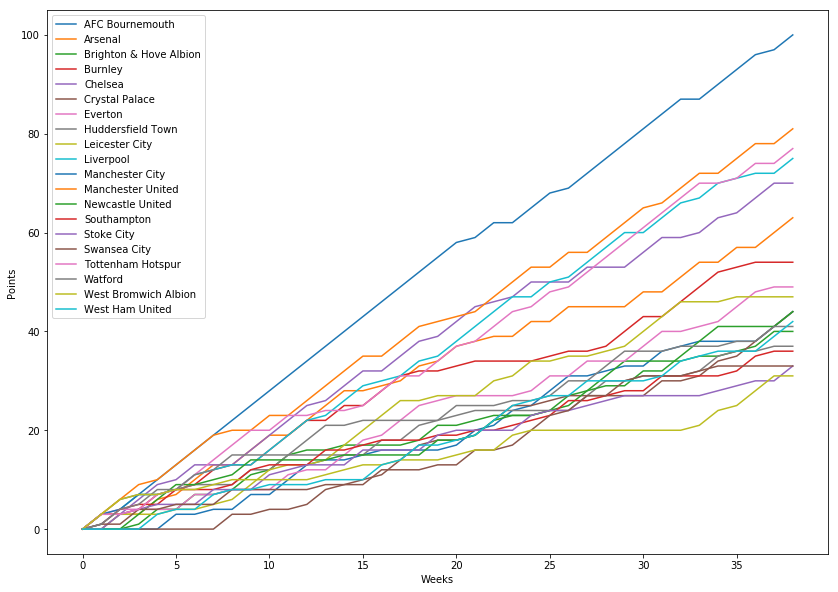

In [348]:
from matplotlib.pyplot import figure
#total points
#X= weeks
#Y=points
#aresenal(1,3)
#arsenal(2,1)
plt.figure(figsize=(14,10))
fig=plt.plot(weeks,thePlot.T)
plt.legend(thePlot.T.columns)
plt.ylabel("Points")
plt.xlabel("Weeks")
